# Weekdays 24 Hours Average Daily Traffic Speed, Flow, and Occupancy Data Analysis

Edward Kang
912655433

# Introduction

  Traffic is related to our daily basis and traffic congestion is a huge problem with many big cities in California . For example, according to the INRIX Global Congestion Ranking, which studied 1,360 cities around the world, San Francisco had the 5th worst traffic congestion in the world and the 3rd worst congestion in the U.S. last year. Therefore, in this project I am going to analyze a data set of the weekday 24 hours daily average traffic speed, flow, and occupancy in one of the intersection in Sacramento. I am going to look at the relationship between speed, flow, occupancy, and time. Next, I am going to use k-means cluster analysis to divide the traffic into high, normal, and free three traffic states to have a deeper view of the different traffic states. In addition, I hope to use the three cluster traffic states to determine the real-time traffic state.

# Exploratory Data Analysis

  The data is taken from a loop traffic detector station. The data were collected from a one way 0.2-mile road segment in an interseciton, and it recorded in weekdays, the average traffic speed, flow, and occupancy of every five minute in 24 hours. In the "data.txt" file, there are total 288 points on record. The first column is the traffic flow. The traffic flow is the number of vehicles pass the road segment per hour. The second column is the traffic speed in units of meter per second. The third column is the traffic occupancy. Traffic occupancy is the percent of time the road segment is occupied by vehicles.

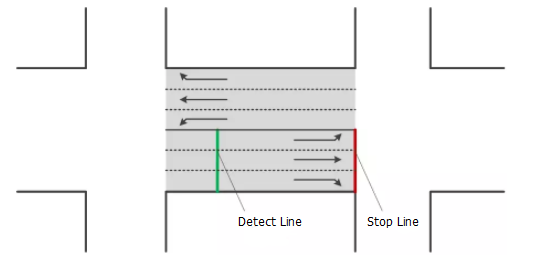

In [3]:
from IPython.display import Image
Image(filename='traffic.png') 

  I want to do a time series of traffic flow, speed, and speed first to get a general idea of the data and look at the trends of the series.

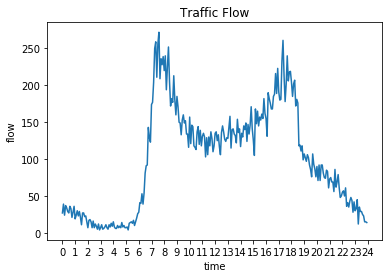

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
rawData = np.loadtxt('data.txt')
fig1 = plt.figure()
ax1= fig1.add_subplot(111)
ax1.set_xticks(np.arange(0,300,12))
ax1.set_xticklabels(range(25))
ax1.set_xlabel('time')
ax1.set_ylabel('flow')
ax1.set_title('Traffic Flow')
ax1.plot(range(len(rawData[:,0])),rawData[:,0])

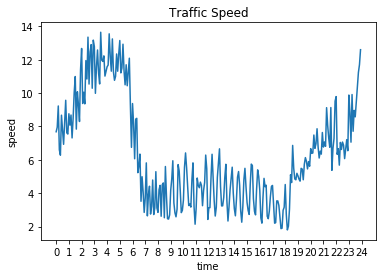

In [2]:
fig2 = plt.figure()
ax2= fig2.add_subplot(111)
ax2.set_xticks(np.arange(0,300,12))
ax2.set_xticklabels(range(25))
ax2.set_xlabel('time')
ax2.set_ylabel('speed')
ax2.set_title('Traffic Speed')
ax2.plot(range(len(rawData[:,1])),rawData[:,1])

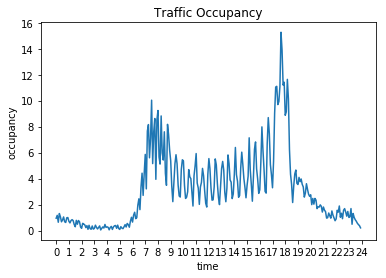

In [3]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.set_xticks(np.arange(0,300,12))
ax3.set_xticklabels(range(25))
ax3.set_xlabel('time')
ax3.set_ylabel('occupancy')
ax3.set_title('Traffic Occupancy')
ax3.plot(range(len(rawData[:,2])),rawData[:,2])

 From the graph we can see clearly see the traffic flow starts to rise rapidly after 6 a.m. due to people start to go to work and schools. The traffic flow goes down a bit during the noon and afternoon period, and it starts to rise again after 5 a.m. due to people go off work. After 6 p.m., the flow starts to go down. Moreover, from the traffic speed graph, it shows an opposite trend when comparing to the flow graph. The speed tends to be fast during midnight and evening periods, and it stays slow from 6 a.m. to 6 p.m. In addition, the traffic occupancy graph shows a similar trend when comparing to the traffic flow graph. However, we can notice that the traffic occupancy during 5 p.m to 6 p.m is higher than the 6 a.m. to 8 a.m. periods. 
  From the three graphs, I observed that traffic flow and traffic occupancy have a positive relationship, while, traffic speed has both negative relationship with traffic flow and traffic occupancy. Also, the traffic in the morning and afternoon there are at high peak, and at noon is normal, and in the evening and at midnight, is low. However, I have to do more analysis to support my observations.

# Analysis and Summary

  Since the data is complex and irregular distributed, I want to do a k-means clustering analysis to group the data onto 3 different traffic states. K-means clustering analysis is a statistical method which has been widely used to separate
data into a set of groups by minimizing within-group distances and maximizing between-group distances. By knowing more different traffic steates, traffic signals can make more efficient decesion on differnt traffic period, and people can do a real-time analysis of the traffic state. The main procedures of my analysis are reading the data, do a normalization on the data, clustering analysis, and presents the graphs. 

normal
[[0.46914081 0.33740027 0.2343497 ]
 [0.09858746 0.70514431 0.04602433]
 [0.76556633 0.23313432 0.52766252]]


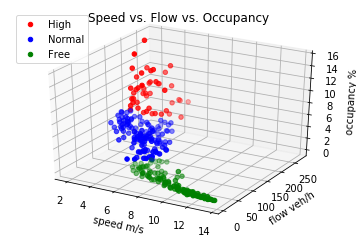

In [4]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from Wizards import *
rawData = np.loadtxt('data.txt')
data = standardize(rawData)
estimator = KMeans(n_clusters=3)
estimator.fit(data)
label_pred = estimator.labels_
centroids = estimator.cluster_centers_
print (centroids)
inertia = estimator.inertia_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
speedCenter =centroids[:,2]
freeList=[]
normalList =[]
highList = []
timeFree = []
timeNormal=[]
timeHigh = []
for i in range(len(data)):
    if speedCenter[label_pred[i]] == min(speedCenter):
        freeList.append(rawData[i,:].tolist())
        timeFree.append(i)
    elif speedCenter[label_pred[i]] == max(speedCenter):
        highList.append(rawData[i,:].tolist())
        timeHigh.append(i)
    else:
        normalList.append(rawData[i,:].tolist())
        timeNormal.append(i)

free = np.array(freeList)
normal = np.array(normalList)
high = np.array(highList)

time=np.array(range(len(data)))
type3 = ax.scatter(high[:,1], high[:,0],high[:,2],color='red')
type2 = ax.scatter(normal[:,1], normal[:,0],normal[:,2],color='blue')
type1= ax.scatter(free[:,1], free[:,0],free[:,2],color='green')
ax.set_title('Speed vs. Flow vs. Occupancy')
ax.set_xlabel('speed m/s')
ax.set_ylabel('flow veh/h')
ax.set_zlabel('occupancy %')
ax.legend((type3, type2, type1), ('High', 'Normal', 'Free'), loc='upper left')

After finished the clustering analysis, I plotted a 3d scatter plot of speed, flow, and occupancy. We can clearly see that from the plot the traffic is divided into three states. I labeled the red points as high peak traffic state, the blue points as the normal traffic state, and the green points as the free traffic state. From the plot we can see that the red points show the speed is slow, while, flow and occupancy are high. The blue points show the speed, flow, and occupancy are about average. The green points show the speed is fast, and the flow and occupancy is low. 

I want to more 3d scatter plots to observe relationship of speed, flow, and occupancy comparing to time.

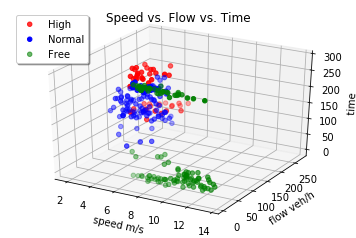

In [5]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(free[:,1], free[:,0],timeFree,color='green')
ax2.scatter(normal[:,1], normal[:,0],timeNormal,color='blue')
ax2.scatter(high[:,1], high[:,0],timeHigh,color='red')

ax2.set_title('Speed vs. Flow vs. Time')
ax2.set_xlabel('speed m/s')
ax2.set_ylabel('flow veh/h')
ax2.set_zlabel('time ')
ax2.legend((type3, type2, type1), ('High', 'Normal', 'Free'), loc='upper left',shadow=True)

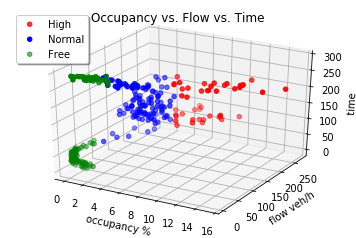

In [6]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(free[:,2], free[:,0],timeFree,color='green')
ax2.scatter(normal[:,2], normal[:,0],timeNormal,color='blue')
ax2.scatter(high[:,2], high[:,0],timeHigh,color='red')

ax2.set_title('Occupancy vs. Flow vs. Time')
ax2.set_xlabel('occupancy %')
ax2.set_ylabel('flow veh/h')
ax2.set_zlabel('time ')
ax2.legend((type3, type2, type1), ('High', 'Normal', 'Free'), loc='upper left',shadow=True)

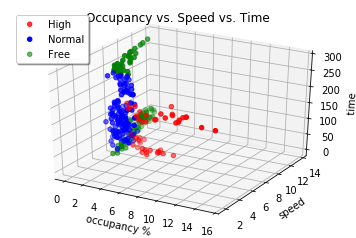

In [7]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(free[:,2], free[:,1],timeFree,color='green')
ax2.scatter(normal[:,2], normal[:,1],timeNormal,color='blue')
ax2.scatter(high[:,2], high[:,1],timeHigh,color='red')

ax2.set_title('Occupancy vs. Speed vs. Time')
ax2.set_xlabel('occupancy %')
ax2.set_ylabel('speed')
ax2.set_zlabel('time ')
ax2.legend((type3, type2, type1), ('High', 'Normal', 'Free'), loc='upper left',shadow=True)

  From the three 3d scatter plots above, only the "Occupancy vs. Flow vs. Time" 3d scatter plot shows the best visualization among the three. We can see from the "Occupancy vs. Flow vs. Time", there are two high red peaks which present the morning and afternoon traffic flow and occupancy. In addition, the green points present the mid-night and evening periods as the low peaks of traffic flow and occupancy. Since the 3d scatter polts are hard to observe the information, I will do 2 dimension scatter polts to compare the variables later.

  Next, I try to get a general idea about the three different traffic states.

In [8]:
avg_flowhigh= sum(high[:,0])/ len(high[:,0])
avg_flownorm = sum(normal[:,0])/ len(normal[:,0])
avg_flowfree = sum(free[:,0])/ len(free[:,0])
avg_speedhigh = sum(high[:,1])/ len(high[:,1])
avg_speednorm = sum(normal[:,1])/ len(normal[:,1])
avg_speedfree = sum(free[:,1])/ len(free[:,1])
avg_occhigh = sum(high[:,2])/ len(high[:,2])
avg_occnorm = sum(normal[:,2])/ len(normal[:,2])
avg_occfree = sum(free[:,2])/ len(free[:,2])

d = {'Flow veh/h':[avg_flowhigh,avg_flownorm,avg_flowfree],'Speed m/s':[avg_speedhigh,avg_speednorm,avg_speedfree],
     'Occupancy %':[avg_occhigh,avg_occnorm,avg_occfree]}
index = ['high','normal','free']
df = pd.DataFrame(data=d, index = index)
print(df)

        Flow veh/h  Occupancy %  Speed m/s
high    208.234043     8.055796   3.182517
normal  127.606299     3.577804   4.605852
free     26.815789     0.702651   9.625927


  I calculated the mean of traffic flow, ocupancy and speed in the three states. The mean of traffic flow in high traffic state is 207 veh/h, in normal state is 126 veh/h, and in free state is 26 veh/h. The mean of traffic occupancy in high state is 8.02%，in normal state is 3.54%, and in free state is 0.69%. Then mean of traffic speed in high state is 3.18 m/s, in normal state is 4.64 m/s, and in free state is 9.65 m/s.

  Additionally, I want to do the box plots of the three states to have a good visualization of comparing the different states.

Text(0,0.5,'veh/h')

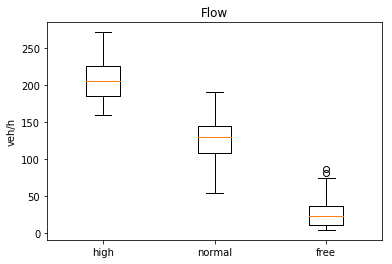

In [9]:
flow = [high[:,0],normal[:,0],free[:,0]]
plt.boxplot(flow)
plt.xticks([1, 2, 3],['high','normal','free'])
plt.title('Flow')
plt.ylabel('veh/h')

Text(0,0.5,'m/s')

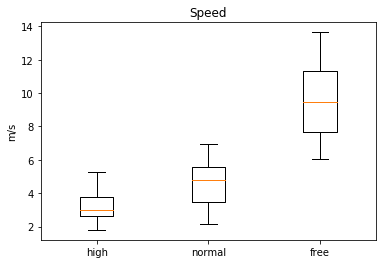

In [10]:
speed = [high[:,1],normal[:,1],free[:,1]]
plt.boxplot(speed)
plt.xticks([1, 2, 3],['high','normal','free'])
plt.title('Speed')
plt.ylabel('m/s')

Text(0,0.5,'%')

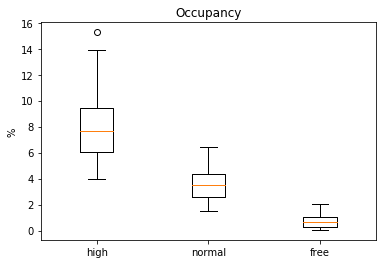

In [11]:
occu = [high[:,2],normal[:,2],free[:,2]]
plt.boxplot(occu)
plt.xticks([1, 2, 3],['high','normal','free'])
plt.title('Occupancy')
plt.ylabel('%')

  From the box plots we can see there is couple outliers of traffic flow in free state, and there is one outlier of traffic occupancy in high state. The traffic has a wide range during free state, while, the occupancy has the wide range during high state.

 Next, I plot the scatter plots of traffic flow, speed, and occupancy each against the time and see how each state distributed in a day.

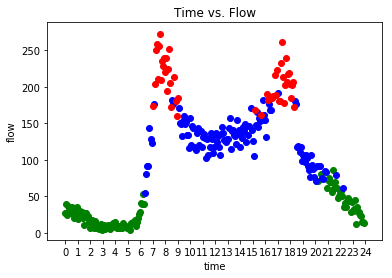

In [12]:
maxState = max(max(free[:,0]),max(normal[:,0]),max(high[:,0]))
maxState = 1
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.set_xticks(np.arange(0,300,12))
ax3.set_xticklabels(range(25))
ax3.set_xlabel('time')
ax3.set_ylabel('flow')
ax3.set_title('Time vs. Flow')
typeFree = ax3.scatter(timeFree,free[:,0]/maxState,color='green')
typeNormal = ax3.scatter(timeNormal,normal[:,0]/maxState,color='blue')
typeHigh = ax3.scatter(timeHigh,high[:,0]/maxState,color='red')

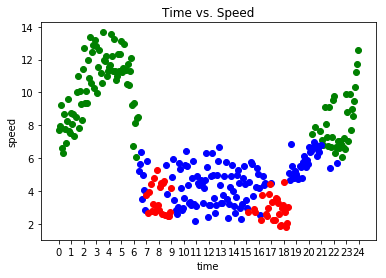

In [23]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.set_xticks(np.arange(0,300,12))
ax4.set_xticklabels(range(25))
ax4.set_title('Time vs. Speed')
ax4.set_xlabel('time')
ax4.set_ylabel('speed')
ax4.scatter(timeFree,free[:,1],color='green')
ax4.scatter(timeNormal,normal[:,1],color='blue')
ax4.scatter(timeHigh,high[:,1],color='red')

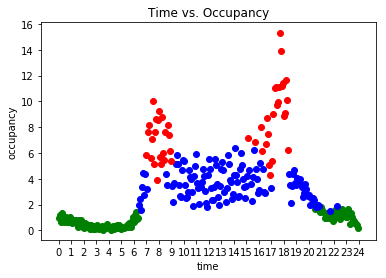

In [14]:
fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
ax5.set_xticks(np.arange(0,300,12))
ax5.set_xticklabels(range(25))
ax5.set_title('Time vs. Occupancy')
ax5.set_xlabel('time')
ax5.set_ylabel('occupancy')
ax5.scatter(timeFree,free[:,2],color='green')
ax5.scatter(timeNormal,normal[:,2],color='blue')
ax5.scatter(timeHigh,high[:,2],color='red')

  We can see from the three scatter plots, they have the similar trends when comparing to the time series plots I did earlier. In all three plots, the green points are distributed among 12 a.m. to 6 a.m. and 9 p.m. to 12 a.m. those two periods. The blue points are distributed among 6 a.m. to 7 a.m., 9 a.m. to 4 p.m., and 7 p.m. to 9 p.m. those three periods. The red points are distributed among 7 a.m. to 9 a.m., 4 p.m. to 7 p.m.. The three plots clearly show that during high traffic state, the traffic flow and occupancy are very high, and the speed is slow. During free traffic state, the traffic flow and occupancy is very low, and the speed is fast. During normal traffic state, the traffic flow and occupancy is about average, while the speed seems as slow as the high traffic state.

 Next, I want to do the two dimension scatter plots to look at the relationship of the traffic flow, speed, and occupancy.

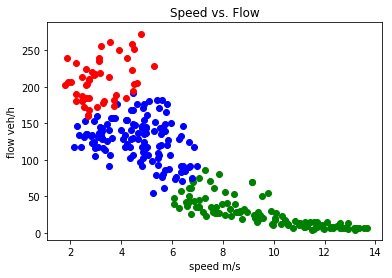

In [15]:
fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
ax6.set_title('Speed vs. Flow')
ax6.set_xlabel('speed m/s')
ax6.set_ylabel('flow veh/h')
ax6.scatter(free[:,1],free[:,0],color='green')
ax6.scatter(normal[:,1],normal[:,0],color='blue')
ax6.scatter(high[:,1],high[:,0],color='red')

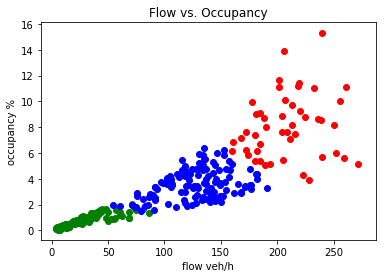

In [16]:
fig7 = plt.figure()
ax7 = fig7.add_subplot(111)
ax7.set_title('Flow vs. Occupancy')
ax7.set_xlabel('flow veh/h')
ax7.set_ylabel('occupancy %')
ax7.scatter(free[:,0], free[:,2],color='green')
ax7.scatter(normal[:,0], normal[:,2],color='blue')
ax7.scatter(high[:,0],high[:,2],color='red')

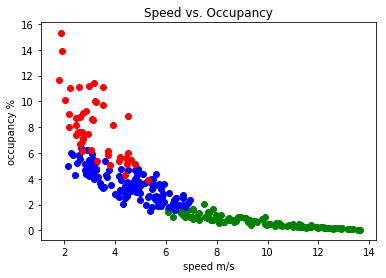

In [17]:
fig8 = plt.figure()
ax8 = fig8.add_subplot(111)
ax8.set_title('Speed vs. Occupancy')
ax8.set_xlabel('speed m/s')
ax8.set_ylabel('occupancy %')
ax8.scatter(free[:,1],free[:,2],color='green')
ax8.scatter(normal[:,1],normal[:,2],color='blue')
ax8.scatter(high[:,1],high[:,2],color='red')

  We can see that the "Flow vs. Speed" and the "Speed vs. Occupancy"  plots both show a downhill pattern from left to right. This indicates a negative relationship between flow and speed, and occupancy and speed. As the speed increase, flow and occupancy decrease. The "Flow vs. Occupancy" plot shows an uphill pattern from left to right. This indicates a positive relationship between flow and occupancy. As the flow increase, the occupancy increase.

# Interpret Real-time Traffic States Analysis

  Next, I want to interpret how to use my three traffic states to do a real-time traffic states analysis. I have the three traffic variables flow(q), occupancy(θ), and speed(v). Using the clustering analysis we get: 
                                        Traffi States(T(i)) = (q(i),θ(i),v(i))   i = 1, 2, 3
1, 2, and 3 each present the traffic states of free, normal, and high.

  Next, we will do a real-time traffic states analysis.
  1. Short term traffic flow prediction: Due to the inherent delay characteristics of acquiring data, there are theoretical deviations from the characterization of traffic states. Here we use the idea of short-term traffic prediction and use predictive values as input to the analysis algorithm to reduce this error. We use modified coefficient α of Sigmoid function: 
                                          q(0) = αQ + (1 - α)Q'
where α = 1 / (1 + e^(-x)). Then we normalization the other two variables occupancy(θ) and speed(v). We get all the real time traffic state variables: T = (q, θ, v,)
  
  2. Traffic states evaluation：Next, we have to determine the real-time traffic state. We compare the real-time traffic variables q, θ, v to our cluster variables q(i),θ(i),v(i): 
                                      s(i) = |cos<T, T(i)>|，i = 1, 2, 3,
Take s(j) = max(si), that is, select the closest cluster states as the final result of real-time traffic state.

# Conclusion

  This project analyzed the data onto weekdays daily average traffic speed, flow, and occupancy. The project found a positive linear relationship between traffic flow and occupancy, and a negative linear relationship between traffic speed and occupancy, and speed and flow. Moreover, I did a k-means clustering analysis to divde the data onto three traffic states, high, normal, and free, and gave a general view，features，and timing of the three different states. Finally, I stated a method to use the three cluster states to determine the real-time traffic state.